In [1]:
import numpy as np
import matplotlib.pyplot as plt

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))
    return set(len_list)

In [2]:
csv_data = []
with open('전국육교정보표준데이터.csv') as f:
    for line in f:
        csv_data.append(my_split(line[:-1]))
assert len(split_len(csv_data)) == 1
np_data = np.array(csv_data)

for e in enumerate(np_data[0]):
    print(e)

{30}
(0, '육교명')
(1, '도로종류')
(2, '도로노선번호')
(3, '도로노선명')
(4, '소재지도로명주소')
(5, '위도')
(6, '경도')
(7, '육교연장')
(8, '육교높이')
(9, '허용통행하중')
(10, '통행제한높이')
(11, '육교폭')
(12, '난간높이')
(13, '조명개수')
(14, '장애인편의시설설치여부')
(15, '장애인편의시설종류')
(16, '장애인편의시설수량')
(17, '부대시설종류')
(18, '부대시설수량')
(19, '육교준공일자')
(20, '내진설계적용여부')
(21, '안전등급')
(22, '사용제한구분')
(23, '육교보수보강내역')
(24, '최종안전점검유형')
(25, '최종안전점검일자')
(26, '관리기관명')
(27, '데이터기준일자')
(28, '제공기관코드')
(29, '제공기관명')


In [12]:
sub_data = np_data[1:,20]
# print(sub_data)
val,cnt = np.unique(sub_data, return_counts = True)

filter1 = sub_data != ' '
sub_data_f = sub_data[filter1]


print(types)
print(cnt[1:])
print(cnt[1:] * 100 / sum(cnt[1:]))

val, cnt = np.unique(sub_data_f, return_counts=True)
print(val,cnt)

[' ' 'N' 'Y']
[695 166]
[80.72009292 19.27990708]
['N' 'Y'] [695 166]


In [29]:
#안전등급별 육교 갯수

sub_data = np_data[1:,21]
# print(btypes)
val,cnt = np.unique(btypes, return_counts = True)
# print(name)
print(val,cnt)
# print(cnt * 100 / sum(count1))

cnt_percent = (cnt * 100) / np.sum(cnt)
print(cnt_percent)

val2 = np.expand_dims(val,1)
print(val.shape, val2.shape)
cnt2 = cnt[:, np.newaxis]
print(cnt.shape, cnt2.shape)

cnt_percent2 = cnt_percent[:, np.newaxis]

jdata = np.concatenate((val2,cnt2,cnt_percent2), axis = 1 )
print(jdata)

filter1 = (np_data[:,21] == '불량')
print(np_data[filter1])

['미흡' '보통' '불량' '양호' '우수'] [ 25 390   1 795   7]
[ 2.05254516 32.01970443  0.08210181 65.27093596  0.57471264]
(5,) (5, 1)
(5,) (5, 1)
[['미흡' '25' '2.052545155993432']
 ['보통' '390' '32.01970443349754']
 ['불량' '1' '0.08210180623973727']
 ['양호' '795' '65.27093596059113']
 ['우수' '7' '0.5747126436781609']]
[['갈평 보도육교' '기타' '경부선' '경부선' '경기도 평택시 서정동 432-3' '37.05929603'
  '127.0533613' '50' '' '' '8.5' '2.3' '' '' 'N' '없음' '' '없음' '' '' 'N'
  '불량' '사용제한' '' '정밀점검' '2020-12-30' '경기도 평택시' '2022-06-13' '3910000'
  '경기도 평택시']]


['육교연장' '육교높이' '허용통행하중' '통행제한높이']
*** 육교연장
중앙값: 39.6
quantile: [30.  39.6 56. ]
iqr:  26.0
upper:  95.0
lower:  -9.0
[  3   9  30  64 100 189 124 103 118  57  62  35  31  23  31  12  17  23
  18  11] [ 5.3   9.76 14.22 18.68 23.14 27.6  32.06 36.52 40.98 45.44 49.9  54.36
 58.82 63.28 67.74 72.2  76.66 81.12 85.58 90.04 94.5 ]


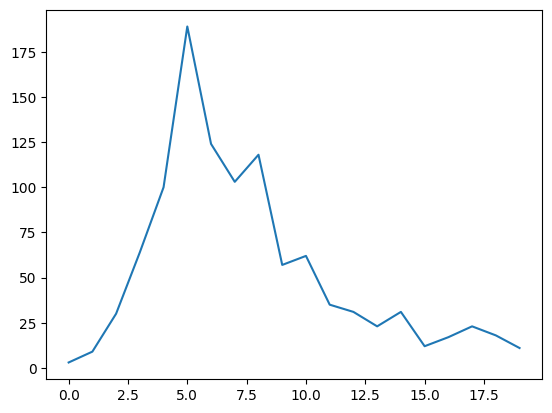

In [104]:
#육교 연장, 허용통행하중, 통행제한 높이: 최소, 최대 , 평균, 표준편차 7 8 9 10 
print(np_data[0,7:11])
# for i in range(7,11):
i = 7
print('***',np_data[0,i])
sub_data = np_data[1:,i]
#결측지 제거
filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0')
#값 형변환
sub_data_f = sub_data[filter1].astype(np.float64)
'''
print(sub_data_f)
print('최소',np.min(sub_data_f))
print('최대',np.max(sub_data_f))
print('평균',np.mean(sub_data_f))
 print('표준편차', np.std(sub_data_f))
'''
# iqr, outliers (이상차)
print( '중앙값:', np.median(sub_data_f))
print('quantile:', np.quantile(sub_data_f,[.25, .5, .75]))
q25, q50, q75 = np.quantile(sub_data_f,[.25,.5,.75])
iqr = q75 - q25
print('iqr: ', iqr)
print('upper: ', q75 + 1.5 * iqr)
print('lower: ', q25 - 1.5 * iqr)
'''
----------q25----------q50----------q75----------
q25 - 1.5 * iqr = 하한선             q75 + 1.5 * iqr = 상한
'''
upper = q75 + 1.5 * iqr
sub_data_cut = sub_data_f[sub_data_f < upper]

h_cnt, h_bins = np.histogram(sub_data_cut, bins = 20) #bins는 통 
print(h_cnt, h_bins)

val, cnt = np.unique(sub_data_cut, return_counts= True) #육교 연장값의 분포
_,axe = plt.subplots()
# axe.scatter(val,cnt)
axe.plot(range(20), h_cnt)

In [59]:
#준공 연도별 육교 장애인 편의시설 여부, 상관관계  19 , 14

sub_data = np_data[1:,[14,19]] #numpy에서는 특정 인덱스 지정 가능
# print(sub_data)
# np.unique(sub_data[:,1])

filter1 = sub_data[:,1] != ''
sub_data_f = sub_data[filter1]

year_yn = []
for yn,ymd in sub_data :
    yr = ymd.split('-')[0]
    year_yn.append(yr + '-' + yn)
# print(year_yn)
year_yn = np.array(year_yn)
val,cny = np.unique(year_yn, return_counts= True)
print(val, cnt)

['-N' '-Y' '1968-N' '1970-N' '1970-Y' '1971-N' '1972-N' '1974-Y' '1976-N'
 '1977-N' '1977-Y' '1978-Y' '1980-N' '1980-Y' '1982-N' '1983-N' '1984-N'
 '1986-Y' '1987-N' '1987-Y' '1988-N' '1988-Y' '1989-N' '1989-Y' '1990-N'
 '1991-N' '1991-Y' '1992-N' '1992-Y' '1993-N' '1993-Y' '1994-N' '1994-Y'
 '1995-N' '1995-Y' '1996-N' '1996-Y' '1997-N' '1997-Y' '1998-N' '1998-Y'
 '1999-N' '1999-Y' '2000-N' '2000-Y' '2001-N' '2001-Y' '2002-N' '2002-Y'
 '2003-N' '2003-Y' '2004-N' '2004-Y' '2005-N' '2005-Y' '2006-N' '2006-Y'
 '2007-N' '2007-Y' '2008-N' '2008-Y' '2009-N' '2009-Y' '2010-N' '2010-Y'
 '2011-N' '2011-Y' '2012-N' '2012-Y' '2013-Y' '2014-N' '2014-Y' '2015-N'
 '2015-Y' '2016-N' '2016-Y' '2017-Y' '2018-N' '2018-Y' '2019-Y' '2020-N'
 '2020-Y' '2021-Y' '2022-Y'] [ 25 390   1 795   7]


{
    year : [y, n...]
}
[
    [year, y_count, ratio]
]

In [71]:
sub_data = np_data[1:,[14,19]]
filter1 = sub_data[:, 1] != ''
sub_data = sub_data[filter1]

pass1 = dict()
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    if yr in pass1.keys():
        pass1[yr].append(yn)
    else:
        pass1[yr] = [yn]
# print(pass1)

pass2 = []
for yr in pass1: #dict 순환시 key값으로 순환
    val,cnt = np.unique(pass1[yr], return_counts=True)
    y, ratio = 0, 0
    if 'Y' in val:
        y = cnt[val == 'Y']
    ratio = y / np.sum(cnt)
    pass2.append((int(yr),int(y),float(ratio)))
# print(pass2)

np.set_printoptions(precision = 3, suppress = True)
pass3 = sorted(pass2, key = lambda x: x[0])
pass3 = np.array(pass3)
print(pass3)

[[1968.       0.       0.   ]
 [1970.       1.       0.5  ]
 [1971.       0.       0.   ]
 [1972.       0.       0.   ]
 [1974.       1.       1.   ]
 [1976.       0.       0.   ]
 [1977.       1.       0.333]
 [1978.       1.       1.   ]
 [1980.       1.       0.25 ]
 [1982.       0.       0.   ]
 [1983.       0.       0.   ]
 [1984.       0.       0.   ]
 [1986.       8.       1.   ]
 [1987.       2.       0.4  ]
 [1988.       3.       0.429]
 [1989.       4.       0.571]
 [1990.       0.       0.   ]
 [1991.       2.       0.2  ]
 [1992.      19.       0.404]
 [1993.      21.       0.447]
 [1994.      11.       0.407]
 [1995.       7.       0.304]
 [1996.      17.       0.34 ]
 [1997.      24.       0.453]
 [1998.      15.       0.341]
 [1999.       9.       0.391]
 [2000.      10.       0.556]
 [2001.      13.       0.5  ]
 [2002.      14.       0.636]
 [2003.      17.       0.607]
 [2004.      17.       0.654]
 [2005.      21.       0.778]
 [2006.      26.       0.788]
 [2007.   

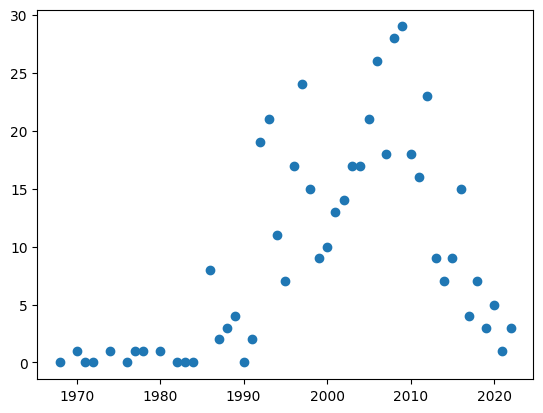

In [75]:
_,axe = plt.subplots()
axe.scatter(pass3[:,0], pass3[:,1])

In [80]:
# print(pass3)
filter1 = pass3[:,0] >= 1990
pass4 = pass3[filter1]
print(pass4)
print(np.corrcoef(pass4[:,0],pass4[:,2]))

[[1990.       0.       0.   ]
 [1991.       2.       0.2  ]
 [1992.      19.       0.404]
 [1993.      21.       0.447]
 [1994.      11.       0.407]
 [1995.       7.       0.304]
 [1996.      17.       0.34 ]
 [1997.      24.       0.453]
 [1998.      15.       0.341]
 [1999.       9.       0.391]
 [2000.      10.       0.556]
 [2001.      13.       0.5  ]
 [2002.      14.       0.636]
 [2003.      17.       0.607]
 [2004.      17.       0.654]
 [2005.      21.       0.778]
 [2006.      26.       0.788]
 [2007.      18.       0.75 ]
 [2008.      28.       0.778]
 [2009.      29.       0.644]
 [2010.      18.       0.643]
 [2011.      16.       0.727]
 [2012.      23.       0.742]
 [2013.       9.       1.   ]
 [2014.       7.       0.538]
 [2015.       9.       0.818]
 [2016.      15.       0.789]
 [2017.       4.       1.   ]
 [2018.       7.       0.7  ]
 [2019.       3.       1.   ]
 [2020.       5.       0.833]
 [2021.       1.       1.   ]
 [2022.       3.       1.   ]]
[[1.    0